<h1>Ciência dos Dados - 2021.1: Projeto 2</h1>
<h2>Previsão de metascore a partir de dados secundários</h2>

<h3>Integrantes:</h3>

- Gabriel Hideki Stanzani Onishi (2A)
- Lucca de Paiva Barroso Saraiva (2A)

<h2>Objetivos do Projeto</h2>

<p style='text-align:justify'>
A arte é integral para a evolução do ser humano. Sermos capazes de nos expressar através de um poema, de um desenho ou de um filme é parte do que nos faz únicos nesse planeta. Não é a toa que para alguns filósofos, como para o alemão Friedrich Nietzsche, a arte é o motor que nos faz evoluir como espécie, sendo a nossa esperança de chegar na melhor versão de nós mesmos. Tão notável quanto a obra em si, entretanto, é a singularidade do efeito que ela provoca em cada pessoa. 

Todos saímos de um filme com uma impressão diferente, mas são poucos os que tem a sua opinião levada para milhares de outras pessoas. Críticos são os responsáveis pela dificílima tarefa de julgar obras de arte de forma a trazer um veredito a respeito de sua qualidade, além de ter que transmiti-lo para aqueles que ainda não puderam experenciar a obra (ou àqueles que querem ter a sua opinião validada, é claro). Não há, entretanto, um conjunto de regras que esses profissionais tenham que seguir$^1$ para resumir em uma nota algo tão subjetivo quanto um longa-metragem, o que faz com que certos vieses se manifestem.

Um exemplo claro está presente na maior premiação anual de cinema. Os prêmios da Academia de Cinema dos Estados Unidos ou, como são popularmente conhecidos, os Oscars, tem um segredo que poucos sabem. Os vencedores de melhor filme do evento seguem um notável padrão, e filmes que o respeitam recebem até receberam um apelido: "Oscar Baits", ou Iscas de Oscar. O estudo mencionado nesse <a href='https://www.businessinsider.com/oscars-academy-awards-rigged-best-picture-nominations-win-2019-2?op=1'>artigo da Business Insider</a> revela que assustadores 94% dos vencedores pertencem à categoria drama contra apenas 2% de filmes de ação e aventura. Além disso, o texto sugere que há uma preferência para filmes longos (e portanto teoricamente mais importantes) - 76% dos vencedores desde 1960 têm mais de duas horas de duração.<br>
    <img src="oscar.jpg" width=400>
<br>
Munidos da curiosidade de verificar esses viéses em uma base de dados maior, os alunos se propuseram a analisar um conjunto de mais de 80 mil filmes para responder a seguintes pergunta: será que é possível estimar o metascore$^2$ (<b>target</b>) de um longa-metragem a partir da análise de suas características$^3$? Esperamos que esse estudo sirva de inspiração para que se desmistifique a nota de críticos como autoridades absolutas, dando mais conforto para que aqueles que gostem de cinema possam ter opinião própria sem precisar se basear em reviews de terceiros.

$^1$É claro que houve tentativas na história da filosofia de se padronizar a forma de crítica da arte. O empirista escocês David Hume foi um dos teóricos dessa área, tendo escrito uma série de regras para que o "tastemaker" (ou fazedor de gosto, numa tradução literal) chegue o mais próximo possível de uma resenha informal acerca do objeto estudado.<br>
$^2$Metascore é uma nota atribuida sobre uma obra pelo site Metascore. Para a nota final, leva-se em conta um conjunto de críticas de meios de comunicação<br>
    $^3$ As características levadas em conta nesse estudo (<b>features</b>) foram gênero, duração, receita global, país de origem e línguas presentes no filme
</p>

<h2>Sobre o Dataset

O dataset escolhido para esse trabalho foi o <a href="https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+movies.csv">IMDB Movies Extensive Dataset</a>, mais especificamente a planilha "IMDB movies.csv". Essa planilha contém todos os títulos presentes no <a href="https://www.imdb.com/">site de dados cinematográficos IMDB</a>, com diversas informações a respeito de cada filme.

A base de dados foi retirada do site de machine learning e base de dados <a href="https://www.kaggle.com/">Kaggle</a>

<h2> Parte 0: Importando elementos</h2>

In [1]:
#Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

In [2]:
#função utilizada para fazer a regressão linear mais tarde no código
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [3]:
# Importando planilha de dados brutos
dados_bruto = pd.read_csv('IMDb movies.csv')
#Mostrando o tamanho do dataset
print(dados_bruto.shape)
#Mostrando o dataset inicial
dados_bruto.head()

C:\Users\Gabriel Onishi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(85855, 22)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


Como se pode observar, o dataset escolhido é bem extenso e conta com uma quantidade enorme de filmes. Contudo, nem todas as colunas são de interesse do projeto, além de haver informações incompletas a respeito de alguns filmes (ausência de metascore, por exemplo). Portanto, é necessário fazer uma limpezea desse conjunto de dados para que se possa minerar informações de uma forma mais organizada.

<h2>Parte I: Limpeza inicial</h2>

Nesse projeto, buscou-se observar se as seguintes variáveis tinham efeito no metascore

Variável | Descrição
:---:|---:
original_title | Título do filme na sua língua original
year | Ano de lançamento do filme
country | Países em que o filme foi filmado
language | Línguas presentes no filme
worlwide_gross_income | Receita global do filme
budget | Orçamento do filme
duration | Duração do filme em minutos

Abaixo filtramos o banco de dados original com essas variáveis. Além disso, todos os filmes que não tinham alguma dessas informações foram removidos.

In [4]:
#Seleção de Colunas relevantes
dados = dados_bruto[['original_title','year', 'genre', 'country', 'language','worlwide_gross_income','budget', 'metascore', 'duration' ]]

#Remoção de valores nulos (NaN)
dados = dados.dropna()
dados

,original_title,year,genre,country,language,worlwide_gross_income,budget,metascore,duration
506,Metropolis,1927,"Drama, Sci-Fi",Germany,German,$ 1349711,DEM 6000000,98.0,153
628,The Circus,1928,"Comedy, Romance",USA,English,$ 26916,$ 900000,90.0,72
1048,City Lights,1931,"Comedy, Drama, Romance",USA,English,$ 46008,$ 1500000,99.0,87
1086,Frankenstein,1931,"Drama, Horror, Romance",USA,"English, Latin",$ 1626,$ 291000,91.0,70
1301,Freaks,1932,"Drama, Horror",USA,"English, German, French",$ 4072,$ 310607,80.0,64
...,...,...,...,...,...,...,...,...,...
85397,Jexi,2019,"Comedy, Romance","USA, Canada",English,$ 9341824,$ 5000000,39.0,84
85460,Tenki no ko,2019,"Animation, Drama, Family","Japan, China",Japanese,$ 193176979,$ 11100000,72.0,112
85503,Tommaso,2019,Drama,"Italy, UK, USA, Greece","English, Italian, Russian",$ 23588,EUR 3000000,66.0,115
85592,Quezon's Game,2018,"Drama, History",Philippines,English,$ 5986,$ 500000,36.0,127


In [5]:
#analisando o tipo de dados de cada uma das colunas
dados.dtypes

original_title            object
year                      object
genre                     object
country                   object
language                  object
worlwide_gross_income     object
budget                    object
metascore                float64
duration                   int64
dtype: object

Pode-se observar que nem todos os dados estão com tipo de variáveis adequadas. Mudaremos isso pouco a pouco no código.

In [6]:
#Fazendo seleção de uma planilha com filmes do ano de 1985 - 2000
#Dessa forma minimizamos a depreciação do dinheiro (inflação)

#todos dados estão como object, por isso é necessário trocar para os tipos de variáveis adequados
dados.year = dados.year.astype('int')
dados = dados.loc[(dados.year>=1985) & (dados.year<=2000),:]
dados.head()

,original_title,year,genre,country,language,worlwide_gross_income,budget,metascore,duration
21389,The Falcon and the Snowman,1985,"Biography, Crime, Drama","UK, USA, Mexico",English,$ 17130087,$ 12000000,68.0,131
21425,Godzilla 1985,1985,"Action, Horror, Sci-Fi",Japan,"Japanese, Russian, English",$ 4116395,$ 2000000,31.0,82
21784,After Hours,1985,"Comedy, Crime, Drama",USA,English,$ 10609321,$ 4500000,90.0,97
21785,Agnes of God,1985,"Drama, Mystery",USA,"English, French, Latin",$ 25627836,$ 10000000,52.0,98
21795,American Ninja,1985,"Action, Adventure, Romance","USA, Philippines","English, Spanish, Japanese",$ 10499694,$ 1000000,20.0,95


In [7]:
# Selecionando apenas filmes com budget medido em dólar (começa com $) para uniformizar
dados = dados.loc[dados.budget.str.startswith('$'),:]

#Removendo cifrão da tabela de bilheteria e budget para trabalharmos com float
#Removendo vírgulas das colunas de gênero, country e language para guardarmos eles em variáveis adequadas
def removepont(text):
    cif = '[$,]' 
    pattern = re.compile(cif)
    text_subbed = re.sub(pattern,'', text)
    return text_subbed

dados.worlwide_gross_income = dados.worlwide_gross_income.apply(removepont)
dados.budget = dados.budget.apply(removepont)
dados.genre = dados.genre.apply(removepont)
dados.country = dados.country.apply(removepont)
dados.language = dados.language.apply(removepont)
dados.worlwide_gross_income = dados.worlwide_gross_income.astype('float')
dados.year = dados.year.astype('int')
dados.budget = dados.budget.astype('float')

In [8]:
# reindexando as linhas para facilitar trabalho
dados.reset_index(inplace=True)

Fica muito difícil minerar dados de gênero, língua e país de origem dispostos da maneira que estão. Por isso, criamos colunas extras que funcionam como "dummy variables", isto é, variáveis binárias (uma coluna "drama" por exemplo só retornaria duas informações: sim (1) ou não (0)). O nome desse processo que transforma variáveis categóricas em várias variáveis binárias é denominada <b>One-Hot Encoding<b>

In [9]:
dados['drama'] = 0
dados['comedy'] = 0
dados['action'] = 0

In [10]:
#lendo a coluna genre de cada linha e vendo a qual gênero pertence
for i in range(len(dados)):
    for genre in dados.iloc[i].genre.split():
        if genre == 'Drama':
            dados.at[i,'drama'] = 1
        if genre == 'Comedy':
            dados.at[i,'comedy'] = 1
        if genre == 'Action':
            dados.at[i,'action'] = 1

In [11]:
#Fazendo o mesmo processo para língua e para país de origem
#Buscamos diferenciar filmes feitos nos EUA do resto do mundo e filmes em inglês com filmes em língua estrangeira
dados['americano'] = 0
dados['em_ingles'] = 0

In [12]:
for i in range(len(dados)):
    for country in dados.iloc[i].country.split():
        if country == 'USA':
            dados.at[i,'americano'] = 1
            break
        else:
            dados.at[i,'americano'] = 0
    for lang in dados.iloc[i].language.split():
        if lang =='English':
            dados.at[i,'em_ingles'] = 1
            break
        else:
            dados.at[i,'em_ingles'] = 0

In [13]:
dados.head(5)

,index,original_title,year,genre,country,language,worlwide_gross_income,budget,metascore,duration,drama,comedy,action,americano,em_ingles
0,21389,The Falcon and the Snowman,1985,Biography Crime Drama,UK USA Mexico,English,17130087.0,12000000.0,68.0,131,1,0,0,1,1
1,21425,Godzilla 1985,1985,Action Horror Sci-Fi,Japan,Japanese Russian English,4116395.0,2000000.0,31.0,82,0,0,1,0,1
2,21784,After Hours,1985,Comedy Crime Drama,USA,English,10609321.0,4500000.0,90.0,97,1,1,0,1,1
3,21785,Agnes of God,1985,Drama Mystery,USA,English French Latin,25627836.0,10000000.0,52.0,98,1,0,0,1,1
4,21795,American Ninja,1985,Action Adventure Romance,USA Philippines,English Spanish Japanese,10499694.0,1000000.0,20.0,95,0,0,1,1,1


Finalizada essa etapa de limpeza inicial, podemos começar a explorar os dados de uma maneira mais fácil e organizada.

<h2>Parte 2: Análise Exploratória</h2>

<h3>Analisando Distribuição de Metascore</h3>

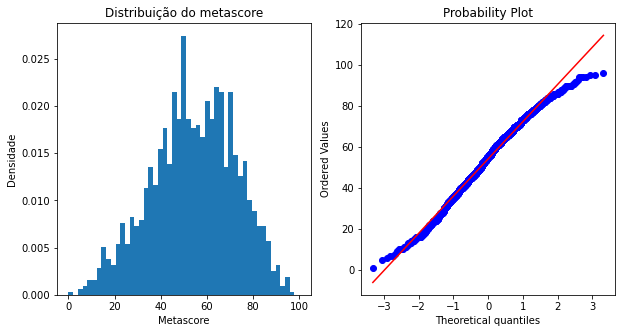

In [14]:
# Fazendo análise da distribuição do metascore
plt.figure(figsize=(10,5))

plt.subplot(121)
faixa = np.linspace(0,100,50)
plt.hist(dados.metascore,density=True,bins=faixa)
plt.title('Distribuição do metascore')
plt.xlabel('Metascore')
plt.ylabel('Densidade')

plt.subplot(122)
stats.probplot(dados.metascore,dist='norm',plot=plt)
plt.show()

In [15]:
print(f'Média do valor de metascore:{round(dados.metascore.mean())}')
print(f'Desvio padrão do metascore:{round(dados.metascore.std(),2)}')

Média do valor de metascore:54
Desvio padrão do metascore:18.22


Como se pode observar, o metascore tem uma distribuição próxima à normal, apesar de ter caudas menos expressivas (o gráfico da direita confirma isso - nesse tipo de gráfico, quanto mais perto os pontos azuis estão da linha vermelha, mais próximo de uma distribuição normal estão os dados). A média do metascore foi 54 pontos, com um desvio-padrão de 18.21 pontos. Isso pode significar que o metascore é dado de maneira equilibrada, ou seja, uma quantidade parecida de filmes são considerados bons e ruins.

<h3> Analisando Correlação Metascore-Rendimento

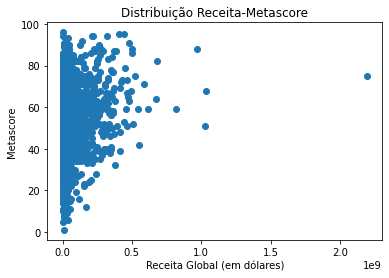

In [16]:
plt.scatter(dados['worlwide_gross_income'], dados.metascore)
plt.xlabel('Receita Global (em dólares)')
plt.ylabel('Metascore')
plt.title('Distribuição Receita-Metascore')
plt.show()

Analisando o gráfico de disperção acima, é possível ver que um ponto se destaca por ter gerado uma receita muito maior do que a dos outros. A esses dados excepcionais se dá o nome 'outlier', que geralmente são removidos para que melhor se observe o comportamento geral do resto dos dados.

In [17]:
#Para os curiosos, o filme que ultrapassou todos os outros nesse quesito foi Titanic, de 1997
dados.loc[dados.worlwide_gross_income>2000000000]

,index,original_title,year,genre,country,language,worlwide_gross_income,budget,metascore,duration,drama,comedy,action,americano,em_ingles
1063,31086,Titanic,1997,Drama Romance,USA Mexico Australia Canada,English Swedish Italian French,2.195170e+09,200000000.0,75.0,194,1,0,0,1,1


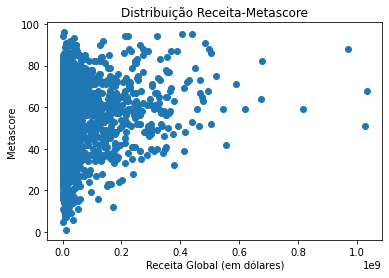

In [18]:
#removendo outlier na coluna de receita mundial
dados = dados.loc[dados['worlwide_gross_income']<2000000000,:]
#vendo novo gráfico de disperção
plt.scatter(dados['worlwide_gross_income'], dados.metascore)
plt.xlabel('Receita Global (em dólares)')
plt.ylabel('Metascore')
plt.title('Distribuição Receita-Metascore')
plt.show()

A partir da análise dos dados, parece que existe uma leve tendência de filmes mais rentáveis terem um maior metascore. Contudo, há muitas exceções, com diversos filmes que não lucraram praticamente nada ganhando notas altíssimas.

Uma forma mais matemática de se observar essa tendência é a partir do cálculo da correlação. Esse coeficiente é uma medida da assossiação linear entre duas variáveis, retornando sempre um número entre -1 e 1. Se a correlação é 1, isso significa que as duas variáveis estão em perfeito alinhamento positivamente, enquanto se a correlação é -1, isso significa que as duas variáveis estão em perfeito alinhamento negativamente.

In [19]:
#vendo a correlação presente entre receita e metascore
print(f'A correlação entre metascore e renda mundial é: {round(dados.worlwide_gross_income.corr(dados.metascore), 3)}')

A correlação entre metascore e renda mundial é: 0.162


O cálculo da correlação confirma nossa hipótese - há uma leve tendência dos filmes mais rentáveis gerarem críticas melhores. Isso condiz com uma lógica apresentada no <a href='https://www.businessinsider.com/oscars-academy-awards-rigged-best-picture-nominations-win-2019-2?op=1'>artigo</a> mencionado na introdução. Pode ser que, depois que filmes recebem boas críticas, mais pessoas estejam interessadas em vê-los, gerando maior receita para o estúdio.

<h3> Analisando Correlação Metascore-Orçamento

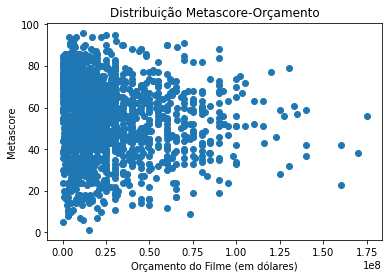

In [20]:
plt.scatter(dados.budget,dados.metascore)
plt.xlabel('Orçamento do Filme (em dólares)')
plt.ylabel('Metascore')
plt.title('Distribuição Metascore-Orçamento')
plt.show()

In [21]:
dados.budget.corr(dados.metascore)

-0.080842673448128

A análise do gráfico não nos permite enxergar um padrão muito claro, já que os filmes estão bem distribuídos no plano. O cálculo da correlação confirma essa hipótese, com um coeficiente muito próximo de 0. Dessa forma, pode-se dizer que, em linhas gerais, um filme com um orçamento grande não renderá boas impressões dos críticos, diferente do que alguns estúdios desejassem.

<h3>Analisando Correlação Metascore-Duração

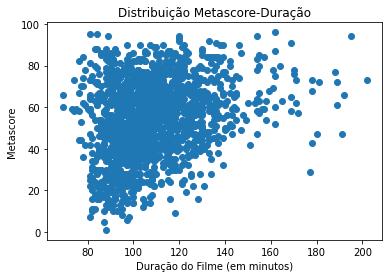

In [22]:
plt.scatter(dados.duration, dados.metascore)
plt.xlabel('Duração do Filme (em minutos)')
plt.ylabel('Metascore')
plt.title('Distribuição Metascore-Duração')
plt.show()

In [23]:
dados.duration.corr(dados.metascore)

0.27282851451587986

A análise do gráfico parece mostrar que há uma leve tendência de filmes mais duradouros receberem melhores críticas, hipótese confirmada pela correlação. Esse viés também está presente no <a href='https://www.businessinsider.com/oscars-academy-awards-rigged-best-picture-nominations-win-2019-2?op=1'>artigo</a> mencionado na introdução - é possível que filmes mais longos dêem uma impressão de grandiosidade, rendendo críticas mais positivas.

<h3>Analisando Para Gêneros Diferentes</h3>

In [24]:
#Separando a base de dados por gênero 
filme_acao = dados.loc[dados.action==1]
filme_drama = dados.loc[dados.drama==1]
filme_comedia = dados.loc[dados.comedy==1]

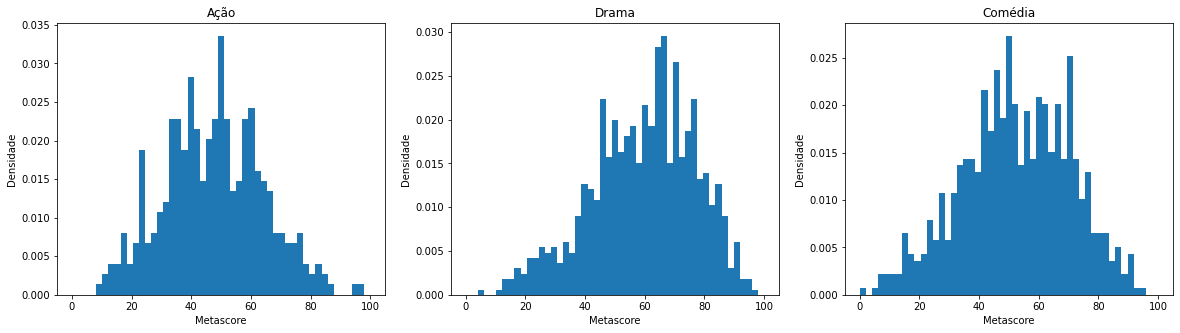

In [25]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(filme_acao.metascore,density=True,bins=faixa)
plt.title('Ação')
plt.xlabel('Metascore')
plt.ylabel('Densidade')

plt.subplot(132)
plt.hist(filme_drama.metascore,density=True,bins=faixa)
plt.title('Drama')
plt.xlabel('Metascore')
plt.ylabel('Densidade')

plt.subplot(133)
plt.hist(filme_comedia.metascore,density=True,bins=faixa)
plt.title('Comédia')
plt.xlabel('Metascore')
plt.ylabel('Densidade')

plt.show()

In [26]:
print(f'A média do metascore de filmes da categoria drama é {filme_drama.metascore.mean()}')
print(f'A média do metascore de filmes da categoria comédia é {filme_comedia.metascore.mean()}')
print(f'A média do metascore de filmes da categoria ação é {filme_acao.metascore.mean()}')

A média do metascore de filmes da categoria drama é 59.54064039408867
A média do metascore de filmes da categoria comédia é 52.38563049853372
A média do metascore de filmes da categoria ação é 47.50958904109589


Observa-se que filmes de gênero drama tem a maior média entre os demais, enquanto os de filme de ação dem a menor. Além disso, parece que o metascore se distribui de maneira próxima à normal dentro dos gêneros de filme, assim como era a distribuição nos filmes em geral. Mais uma vez, parece que o <a href='https://www.businessinsider.com/oscars-academy-awards-rigged-best-picture-nominations-win-2019-2?op=1'>artigo da Business Insider</a> parece ter razão para fora dos Oscars. Filmes dramáticos parecem ser de fato os favoritos dos críticos, deixando outros gêneros de lado.

<h3>Analisando Para Línguas e Países Diferentes</h3>

In [27]:
filme_americano = dados.loc[dados.americano==1]
filme_estrangeiro = dados.loc[dados.americano==0]
filme_em_ingles = dados.loc[dados.em_ingles==1]
filme_sem_ingles = dados.loc[dados.em_ingles==0]

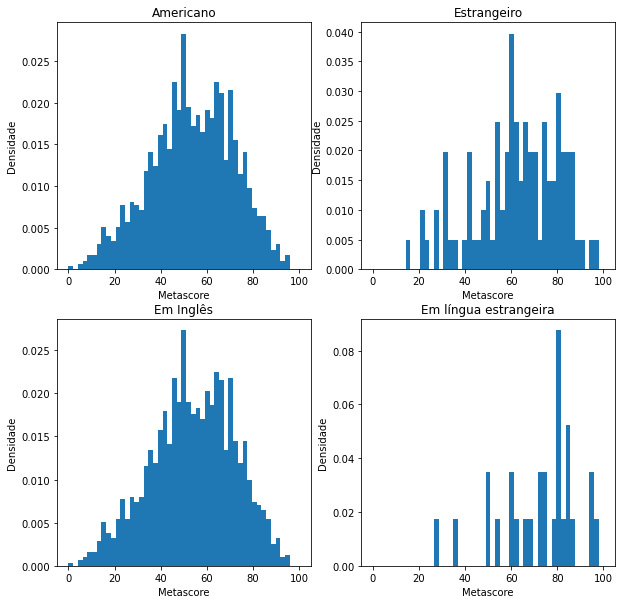

In [28]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.hist(filme_americano.metascore,density=True,bins=faixa)
plt.title('Americano')
plt.xlabel('Metascore')
plt.ylabel('Densidade')

plt.subplot(222)
plt.hist(filme_estrangeiro.metascore,density=True,bins=faixa)
plt.title('Estrangeiro')
plt.xlabel('Metascore')
plt.ylabel('Densidade')

plt.subplot(223)
plt.hist(filme_em_ingles.metascore,density=True,bins=faixa)
plt.title('Em Inglês')
plt.xlabel('Metascore')
plt.ylabel('Densidade')

plt.subplot(224)
plt.hist(filme_sem_ingles.metascore,density=True,bins=faixa)
plt.title('Em língua estrangeira')
plt.xlabel('Metascore')
plt.ylabel('Densidade')

plt.show()

In [29]:
print(f'A média do metascore de filmes americanos é {filme_americano.metascore.mean()}')
print(f'A média do metascore de filmes estrangeiros é {filme_estrangeiro.metascore.mean()}')
print(f'A média do metascore de filmes em inglês é {filme_em_ingles.metascore.mean()}')
print(f'A média do metascore de filmes em língua estrangeira é {filme_sem_ingles.metascore.mean()}')

A média do metascore de filmes americanos é 53.644917582417584
A média do metascore de filmes estrangeiros é 62.57575757575758
A média do metascore de filmes em inglês é 53.88539620170268
A média do metascore de filmes em língua estrangeira é 72.10714285714286


In [30]:
print(len(filme_estrangeiro))
print(len(filme_sem_ingles))

99
28


Observa-se que a média de um filme estrangeiro é maior do que a média de filmes americanos, enquanto filmes em língua estrangeira tem um metascore gritantemente mais alto do que os demais. Isso se deve ao fato do metascore ter como base reviews de meios de comunicação americanos. Dessa forma, é muito mais provável que um filme em língua estrangeira não seja avaliado a não ser que já haja uma boa reputação internacional, indicando que "merece ser assistido". Isso explica também o baixo número de filmes de outros países ou em outras línguas e os histogramas mais esburacados.

<h3>Dividindo Base de Dados Entre Gêneros e Complementares

Nessa etapa, buscou-se analisar como distribuição do metascore para as variáveis numéricas já descritas (orçamento, duração e receita global) mudam de acordo com o gênero do filme. Buscou-se nessa etapa diferenciar apenas um gênero com seu complementar, ou seja, filmes de drama com filmes não dramáticos, filmes de ação com filmes sem ação, e assim por diante.

In [31]:
#Criando base de dados por categoria
dados_drama = dados.loc[dados.drama==1]
dados_ndrama = dados.loc[dados.drama==0]
dados_action = dados.loc[dados.action==1]
dados_naction = dados.loc[dados.action==0]
dados_comedy = dados.loc[dados.comedy==1]
dados_ncomedy = dados.loc[dados.comedy==0]

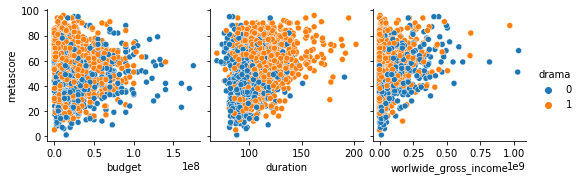

In [32]:
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],diag_kind = None,hue='drama')
plt.show()

In [33]:
print(f'Correlação drama-orçamento: {dados_drama.budget.corr(dados_drama.metascore).round(4)}')
print(f'Correlação sem drama-orçamento: {dados_ndrama.budget.corr(dados_ndrama.metascore).round(4)}')
print(f'Correlação drama-duração: {dados_drama.duration.corr(dados_drama.metascore).round(4)}')
print(f'Correlação sem drama-duração: {dados_ndrama.duration.corr(dados_ndrama.metascore).round(4)}')
print(f'Correlação drama-receita: {dados_drama.worlwide_gross_income.corr(dados_drama.metascore).round(4)}')
print(f'Correlação sem drama-receita: {dados_ndrama.worlwide_gross_income.corr(dados_ndrama.metascore).round(4)}')

Correlação drama-orçamento: -0.1737
Correlação sem drama-orçamento: 0.0574
Correlação drama-duração: 0.174
Correlação sem drama-duração: 0.1861
Correlação drama-receita: 0.1085
Correlação sem drama-receita: 0.2991


 - Gráfico de Orçamento (budget)

A distribuição não parece apontar para uma correlação linear muito diferente entre filmes dramáticos e não dramáticos. Contudo, ao analisarmos a diferença de correlação metascore-orçamento, nota-se que há uma leve tendência de filmes dramáticos conseguirem críticas melhores com orçamentos mais baixos!

 - Gráficos de Duração (duration)

A distribuição não parece muito diferente, hipótese confirmada pela diferença de correlação. Contudo, é possível notar que os pontos em laranja, representantes dos filmes dramáticos, estão deslocados para a direita, indicando que eles tem uma tendência de ser mais duradouros.

 - Gráfico de Receita (worlwide_gross_income)
 
Os filmes de drama parecem estar bem mais deslocados para a direita nesse gráfico, indicando que filmes desse tipo tem uma menor tendência a gerar receita. Além disso, julgando pela correlação, observa-se que a receita tem um peso muito maior para o metascore em filmes não dramáticos do que dramáticos.

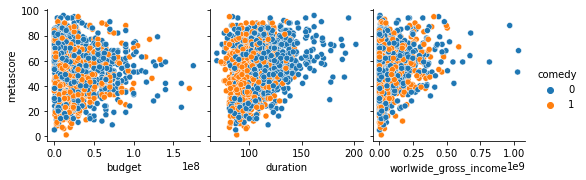

In [34]:
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],diag_kind = None,hue='comedy')
plt.show()

In [35]:
print(f'Correlação comédia-orçamento: {dados_comedy.budget.corr(dados_comedy.metascore).round(4)}')
print(f'Correlação sem comédia-orçamento: {dados_ncomedy.budget.corr(dados_ncomedy.metascore).round(4)}')
print(f'Correlação comédia-duração: {dados_comedy.duration.corr(dados_comedy.metascore).round(4)}')
print(f'Correlação sem comédia-duração: {dados_ncomedy.duration.corr(dados_ncomedy.metascore).round(4)}')
print(f'Correlação comédia-receita: {dados_comedy.worlwide_gross_income.corr(dados_comedy.metascore).round(4)}')
print(f'Correlação sem comédia-receita: {dados_ncomedy.worlwide_gross_income.corr(dados_ncomedy.metascore).round(4)}')

Correlação comédia-orçamento: -0.0471
Correlação sem comédia-orçamento: -0.118
Correlação comédia-duração: 0.2108
Correlação sem comédia-duração: 0.2927
Correlação comédia-receita: 0.1864
Correlação sem comédia-receita: 0.1441


 - Gráfico de Orçamento (budget)

A distribuição parece bem semelhante entre filmes de comédia e sem comédia. A diferença de correlação confirma isso.

 - Gráficos de Duração (duration)

Observa-se que filmes de comédia tem uma tendência a serem curtos. Contudo, não podemos tirar muito além disso. A diferença de correlação é pequena e indica que filmes que não são de comédia tem uma tendência levemente maior a depender de maior duração para agradar os críticos.

 - Gráfico de Receita (worlwide_gross_income)
 
Novamente, tanto o gráfico quanto a diferença de correlação não parecem dizer nada sobre a presença do gênero comédia e a relação metascore-receita.

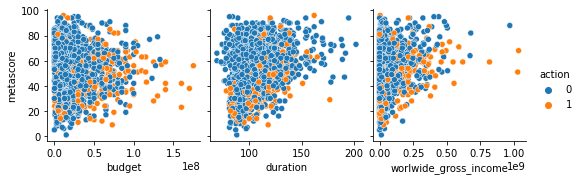

In [36]:
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],diag_kind = None,hue='action')
plt.show()

In [37]:
print(f'Correlação ação-orçamento: {dados_action.budget.corr(dados_action.metascore).round(4)}')
print(f'Correlação sem ação-orçamento: {dados_naction.budget.corr(dados_naction.metascore).round(4)}')
print(f'Correlação ação-duração: {dados_action.duration.corr(dados_action.metascore).round(4)}')
print(f'Correlação sem ação-duração: {dados_naction.duration.corr(dados_naction.metascore).round(4)}')
print(f'Correlação ação-receita: {dados_action.worlwide_gross_income.corr(dados_action.metascore).round(4)}')
print(f'Correlação sem ação-receita: {dados_naction.worlwide_gross_income.corr(dados_naction.metascore).round(4)}')

Correlação ação-orçamento: 0.106
Correlação sem ação-orçamento: -0.0839
Correlação ação-duração: 0.4042
Correlação sem ação-duração: 0.2574
Correlação ação-receita: 0.3164
Correlação sem ação-receita: 0.1727


 - Gráfico de Orçamento (budget)

O gráfico não parece mostrar uma diferença no comportamento dos pontos. Contudo, os cálculos de correlação apontam que filmes de ação parecem depender mais do orçamento para atingirem metascores maiores. Isso se deve provavelmente à necessidade de gasto com infraestrutura (dublês, aluguel de espaços, efeitos especiais) para as grandes cenas de ação.

 - Gráficos de Duração (duration)

Tanto o gráfico quanto as correlações indicam que filmes de ação tem uma relação maior de dependência com a duração do filme. 

 - Gráfico de Receita (worlwide_gross_income)
 
Tanto o gráfico quanto as correlações indicam que filmes de ação tem uma relação maior de dependência com a receita do filme.

<h2>Parte 3: Aplicando Métodos de Regressão

<h3> Aplicando Regressão Linear com Múltiplas Variáveis

A regressão linear é uma ferramenta estatística capaz de prever uma variável target a partir de suas variáveis de contorno. No caso, utilizaremos o Métodos dos Múltiplos Quadrados (MMQ ou OLS. na sigla em inglês). Contudo, nem toda variável de contorno é útil para determinar o target. Portanto, rodamos o código abaixo para ver quais são as variáveis realmente determinantes.

Nesse caso, utilizamos um nível de significância de 5%. Esse coeficiente se trata de uma medida do quão rigoroso queremos ser ao definir a probabilidade da hipótese de que cada feature interfere no metascore. Para tanto, é preciso que o valor-p, que é a probabilidade de obter um resultado igual ao da amostra ou mais extremo sobre essa hipótese, seja menor que 5%

Nessa próxima etapa, realizamos uma seleção de variáveis feature, de forma que possamos filtrar variáveis menos relevantes e concentrar o esforço de regressão em medidas que tenham maior probabilidade de ser relevantes. Para isso gera-se resultados do modelo, primeiramente com todas as variáveis, e descarta-se aquela que tenha tido o maior valor p acima do nível de significância, pois isso indica que ela é menos relevante do que as outras no processo de regressão linear. Esse processo é realizado novamente até que sobrem somente features com valor p abaixo de 5%, pois esse foi o valor determinado para a rigorosidade do modelo.

In [38]:
#selecionando variável target
Y = dados['metascore']

#selecionando variável de contorno
X = dados[['action', 'drama', 'comedy', 'budget', 'em_ingles', 'americano', 'worlwide_gross_income', 'duration']]

#modelo com todas as variáveis explicativas

results = regress(Y,X)
display(results.summary())

#evitar que tenhamos apenas uma variável determinante
while len(results.params)>3:
    
    #buscando os p-values com nível de significância menor do que 5%
    if results.pvalues.max()<0.05:
        break
        
    # Identifica variável com maior valor-p
    i = list(results.pvalues).index(results.pvalues.max())    
    remove = results.pvalues.index[i]
    X.drop(remove, axis=1, inplace=True)
    print("REMOVIDA A VARIÁVEL ", remove)
    
    print("\n\n")
    results = regress(Y,X)
    display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     57.69
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.93e-82
Time:                        20:31:03   Log-Likelihood:                -6515.8
No. Observations:                1555   AIC:                         1.305e+04
Df Residuals:                    1546   BIC:                         1.310e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    49.4691      4.169     11.866      0.000      41.291      57.647
action                   -7.0113      1.084     -6.471      0.000      -9.137      -4.886
drama                     6.9042      0.977      7.068      0.000       4.988       8.820
comedy                   -0.0943      0.929     -0.102      0.919      -1.916       1.727
budget                 -1.48e-07   1.96e-08     -7.549      0.000   -1.86e-07    -1.1e-07
em_ingles               -14.3752      3.452     -4.164      0.000     -21.147      -7.603
americano                -3.7193      1.900     -1.958      0.050      -7.446       0.008
worlwide_gross_income  4.889e-08   4.44e-09     11.011      0.000    4.02e-08    5.76e-08
duration                  0.1932      0.027      7.174      0.000       0.140       0.246
==============================================================================
Omnibus:                       21.043   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.598
Skew:                          -0.233   Prob(JB):                     5.55e-05
Kurtosis:                       2.708   Cond. No.                     1.61e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

REMOVIDA A VARIÁVEL  comedy





C:\Users\Gabriel Onishi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     65.97
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           2.30e-83
Time:                        20:31:03   Log-Likelihood:                -6515.8
No. Observations:                1555   AIC:                         1.305e+04
Df Residuals:                    1547   BIC:                         1.309e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    49.3531      4.008     12.312      0.000      41.491      57.216
action                   -6.9780      1.033     -6.757      0.000      -9.004      -4.952
drama                     6.9271      0.950      7.290      0.000       5.063       8.791
budget                 -1.48e-07   1.96e-08     -7.555      0.000   -1.86e-07    -1.1e-07
em_ingles               -14.3760      3.451     -4.166      0.000     -21.146      -7.606
americano                -3.7301      1.896     -1.967      0.049      -7.450      -0.010
worlwide_gross_income  4.888e-08   4.44e-09     11.014      0.000    4.02e-08    5.76e-08
duration                  0.1938      0.026      7.392      0.000       0.142       0.245
==============================================================================
Omnibus:                       21.046   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.600
Skew:                          -0.233   Prob(JB):                     5.54e-05
Kurtosis:                       2.708   Cond. No.                     1.58e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dessa forma, confirma-se o que já tínhamos visto na parte de análise exploratória - filmes de comédia não parecem ser determinantes na hora de prever o metascore de um filme. Procedemos com o nosso modelo para aplicar só com o resto das variáveis.

In [39]:
#Redefinindo variáveis de contorno sem comédia
X = dados[['action', 'drama', 'budget', 'em_ingles', 'americano', 'worlwide_gross_income', 'duration']]

In [40]:
#Criando planilhas de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(933, 7)
(622, 7)
(933,)
(622,)


In [41]:
model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

C:\Users\Gabriel Onishi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

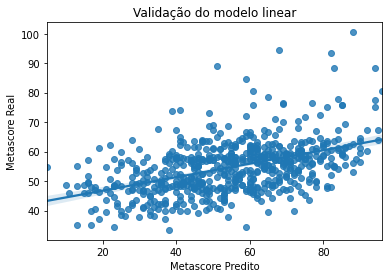

In [42]:
sns.regplot(y_test,predictions)
plt.title('Validação do modelo linear')
plt.xlabel('Metascore Predito')
plt.ylabel('Metascore Real')
plt.plot()

A análise do gráfico permite concluir que o uso de uma regressão linear a partir do MMQ funciona razoavelmente bem. O ideal desse gráfico seria que as escalas fossem iguais e que se enxergasse um alinhamento dos pontos na bissetriz dos eixos xy. Nesse caso, o metascore predito parece ser um pouco menor do que o real no geral (onde prevemos um metascore de 20 o filme tinha um metascore de quase 45, em linhas gerais).

Uma forma mais matemática de analisar esses erros é a partir do teste dos R-quadrados, do erro médio e de homocedasticidade.

A homocedasticidade mede a uniformidade dos erros, se eles mantiveram as previsões afastadas de forma uniforme dos valores reais do teste. Essa avaliação é necessária para validar a utilização da regressão linear como modelo de previsão

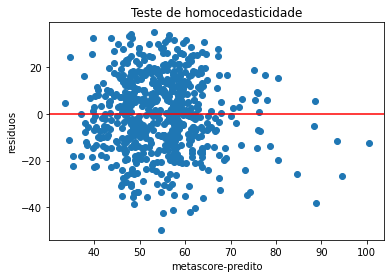

In [43]:

residuos = y_test - predictions

plt.scatter(predictions,residuos);
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Teste de homocedasticidade')
plt.xlabel('metascore-predito')
plt.ylabel('residuos')
plt.show()


Através do gráfico de dispersão acima que apresenta a relação entre os erros de previsão e os valores de metascore previstos, pode-se observar uma certa uniformidade na maneira que esses erros se apresentam para os diferentes valores de previsão indicando que essa suposição está de acordo para a aplicação da regressão linear, caso contrário o gráfico apresentaria uma dispersão menos uniforme ao redor da reta vermelha que indica o erro de 0.

In [44]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              metascore   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     40.47
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           8.25e-50
Time:                        20:31:05   Log-Likelihood:                -3900.4
No. Observations:                 933   AIC:                             7817.
Df Residuals:                     925   BIC:                             7855.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    52.54

A medida R-quadrado(ou R-squared) apresenta o grau em que as variáveis feature, explicam a variável target, variando de 0 a 1, quanto maior, mais importantes são as features para explicar o target. Neste caso obtivemos um valor de R-quadrado de 0.234

A medida de erro médio absoluto, tem por função indicar qual é, em média, a distância entre os valores reais da variável target (nesse caso o metascore) e os valores previstos, permitindo que se avalie se, em média, o quão distantes as previsões do modelo de regressão estão da realidade.

In [45]:
print(f'Modelo final: MAE = {metrics.mean_absolute_error(y_test, predictions)}')

Modelo final: MAE = 13.330886435557291


O modelo final nos forneceu um erro médio absoluto de aproximadamente 13.33 pontos, oque quer dizer que os resultados da previsão estão, em média, 13.33 pontos do metascore distantes de seus valores reais dentro do grupo de teste.

Através da tabela de resultados, pode-se analisar algumas métricas para testar a hipótese de normalidade dos erros. Tomando os testes de Prob(Omnibus) e Prob(Jarque-Bera), que ao apresentar valores baixos como os presentes neste modelo, torna-se mais difícil de aceitar a hipótese de normalidade dos erros, necessária para a aplicação da regressão linear. Portanto para verificar essa hipótese de uma maneira gráfica, avalia-se a distribuição desses resíduos através de um probplot, que gera uma reta, a qual deve ser seguida pelos pontos extraidos do conjundo de erros do modelo, caso os erros sejam próximos de uma distribuição normal, esses pontos devem estar próximos da reta gerada.

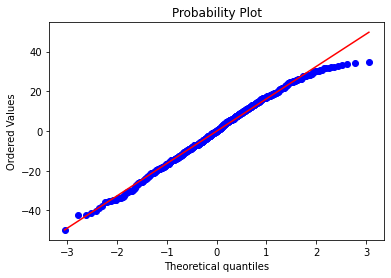

In [46]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.show()

Ao observar o gráfico de probabilidade para uma distribuição normal dos erros, pode-se observar que os erros estão muito próximos de uma distribuição normal, com essa informação pode-se validar o requisito de normalidade dos erros para a aplicação da regressão linear

<h3> Aplicando Regressão com Árvores de Decisão

Para essa parte, usou-se como base a série de vídeos publicados no canal <a href="https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw">StatQuest</a>, criado pelo ex-pesquisador da Universidade da Carolina do Norte, Josh Starner. Mais especificamente, utilizamos os seguintes vídeos:

- <a href='https://www.youtube.com/watch?v=D0efHEJsfHo&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=44'>Introdução à Árvores de Decisão Regressivas</a>
- <a href='https://www.youtube.com/watch?v=D0efHEJsfHo&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=45'>Como Podar Árvores de Decisão Regressivas</a>
- <a href='https://www.youtube.com/watch?v=q90UDEgYqeI&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=45'>Como aplicar Árvores de Decisão no Python</a>

Árvore de decisão é um outro recurso muito utilizado em machine-learning. Em curtas palavras, trata-se do encaixe de uma árvore de probabilidades (as mesmas que são utilizadas para explicar as bases de teoria de probabilidade) a um conjunto de dados. Abaixo se encontra um exemplo simples de árvore de decisão:

<img src="arvoresimples.png" width=500>

<p style='text-align:center'> Imagem ilustrativa de árvore de decisão para definição de grupo de animal </p>

Na imagem acima, as caixas em azul são chamadas de nós, enquanto as caixas em vermelho são denominadas folhas. Em árvores de decisão regressivas, ao invés de termos categorias descritivas (como classificação de grupos de animais), temos um valor numérico. O algarítimo por trás dos códigos de criação da árvore segmenta os dados em diferentes grupos de forma a minimizar o resíduo (o erro) de cada ponto à média deles. Começaremos fazendo uma árvore preliminar para depois procurarmos uma melhor.

O erro médio encontrado foi 17.55
O coeficiente R-Quadrado encontrado foi 0.09


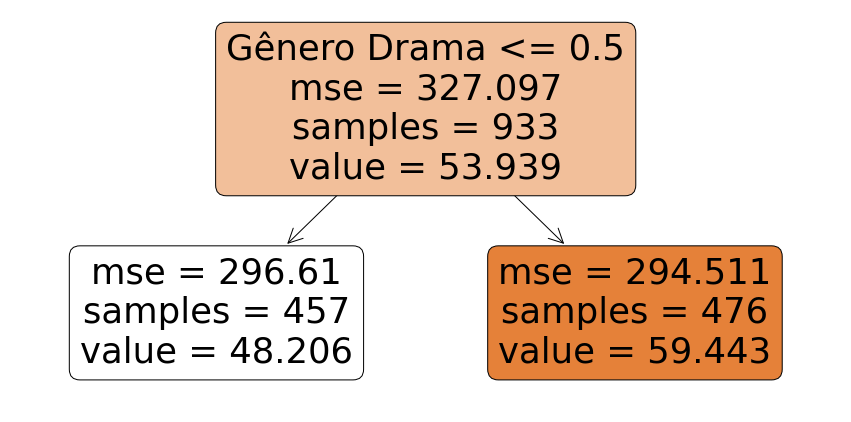

In [47]:
# Aplicando a árvore de decisão regressiva com o módulo tree do sklearn
dt = DecisionTreeRegressor(max_depth=1,random_state=0)
# o parâmetro max_depth define quantas linhas de nós existirão na árvore. Utilizamos 3 aqui para que o plot não
#fique poluído demais e para que possa se entender melhor o conceito de uma árvore de decisão regressiva
dt.fit(X_train,y_train)
prediction2 = dt.predict(X_test)

#cálculo do R-Quadrado e do Erro médio
r2_dt = metrics.r2_score(y_test,prediction2)
mse_dt = MSE(y_test,prediction2)
rmse_dt = mse_dt**0.5

#gerando um arquivo de texto com os dados da árvore
#a árvore pode ser vizualizada copiando as informações do arquivo dtregression.dot e colando no site http://www.webgraphviz.com/
#export_graphviz(dt, out_file='dtregression.dot',feature_names=['action', 'drama', 'budget', 'em_ingles', 'americano', 'worlwide_gross_income', 'duration'])
plt.figure(figsize=(15,7.5))
plot_tree(dt,filled=True,rounded=True,
          feature_names=['Gênero Ação', 'Gênero Drama', 'Orçamento', 'Em inglês', 'Americano', 'Receita global', 'Duração']);
print(f'O erro médio encontrado foi {rmse_dt.round(2)}')
print(f'O coeficiente R-Quadrado encontrado foi {r2_dt.round(2)}')

<p style='text-align:center'> Árvore gerada como exemplo </p>

A árvore gerada na célula acima retornou reseultados piores do que a regressão, já que o R-Quadrado foi menor e o erro médio foi maior. Isso é esperado, visto que ela só dá 2 opções de metascore para os filmes. Contudo, algumas coisas descritas na análise exploratória estão presentes aqui. Nota-se que se o filme é do gênero drama, ela fica para o lado direito da árvore, com notas mais altas do que o lado esquerdo.

É possível podar essa árvore de forma a fazê-la retornar os melhores valores possíveis. Queremos fazer um modelo que se adeque bem tanto à base de treino quanto à de teste. Isso envolve mudar a quantidade máxima de linhas de nós, como já fizemos, assim como outros parâmetros. Para este caso, utilizaremos uma ferramenta estatística chamada <b>Cost-Complexity Pruning</b> (poda por custo-complexidade, numa tradução livre).

Para tanto, gera-se uma grande quantidade de árvores, de forma que cada uma receba uma "nota" de qualidade. Essa nota é calculada a partir da soma dos erros ao quadrado (Sum of Squarred Residuals, ou $SSR$ em inglês) de cada árvore somada com um coeficiente de penalidade por complexidade $\alpha$ vezes quantas folhas ela tem.($T$) Quanto menor for a nota, teoricamente melhor a árvore.

$$Nota = SSR + \alpha . T$$

A soma com coeficiente de penalidade é adicionada para que árvores que se encaixam muito bem com os dados de treino (e portanto mais complexas) sejam prejudicadas, já que refletem um corportamento muito específico e que não é adequadoo para a maioria das bases de teste (overfit).

**AVISO: RODAR AS PRÓXIMAS CÉLULAS DUAS VEZES CASO A ÁRVORE RESULTANTE AO FINAL DO MODELO ESTEJA MUITO GRANDE DEVIDO À UM BUG NÃO IDENTIFICADO**

In [54]:
path = dt.cost_complexity_pruning_path(X_train,y_train) #determina valores para alpha
l_alphas = path.ccp_alphas #extrai diferentes valores para alpha

#OBS: ccp é a sigla em inglês para cost complexity pruning

l_alphas = l_alphas[:-1] #exclui o valor máximo de alpha, que retornaria uma árvore com apenas um nó (modelo muito simplista)

dts = [] #lista com as árvores

#criando uma árvore para cada valor de alpha e guardando na lista acima
for alpha in l_alphas:
    dt = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    dt.fit(X_train,y_train)
    dts.append(dt)

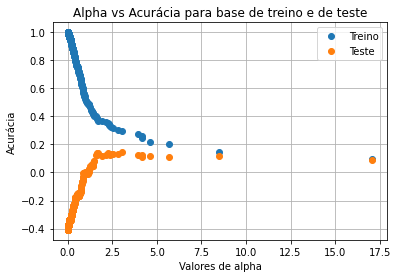

In [55]:
nota_treino = [dt.score(X_train,y_train) for dt in dts]
nota_teste = [dt.score(X_test,y_test) for dt in dts]

plt.plot(l_alphas,nota_treino,'o',label='Treino',drawstyle='steps-post')
plt.plot(l_alphas,nota_teste,'o',label='Teste',drawstyle='steps-post')
plt.legend()
plt.xlabel('Valores de alpha')
plt.ylabel('Acurácia')
plt.title('Alpha vs Acurácia para base de treino e de teste')
plt.grid(True)
plt.show()

Esse gráfico permite perceber claramente o overfit. Valores de alpha muito pequenos se encaixam muito na base de teste, mas desempenham muito mal com a base de treino. Nesse caso, parece que o melhor valor de alpha é próximo de 8.5, já que apresenta a maior acurácia para as duas bases. Printando esse valor e salvando em uma variável

In [56]:
alpha_ideal = 0
for alpha in l_alphas:
    if alpha>7.5 and alpha <10:
        alpha_ideal = alpha
        print(alpha_ideal)

8.462835330205081


Podemos usar esse valor de alpha para plotar a nossa nova árvore.

O erro médio encontrado foi 17.26
O coeficiente R-Quadrado encontrado foi 0.118


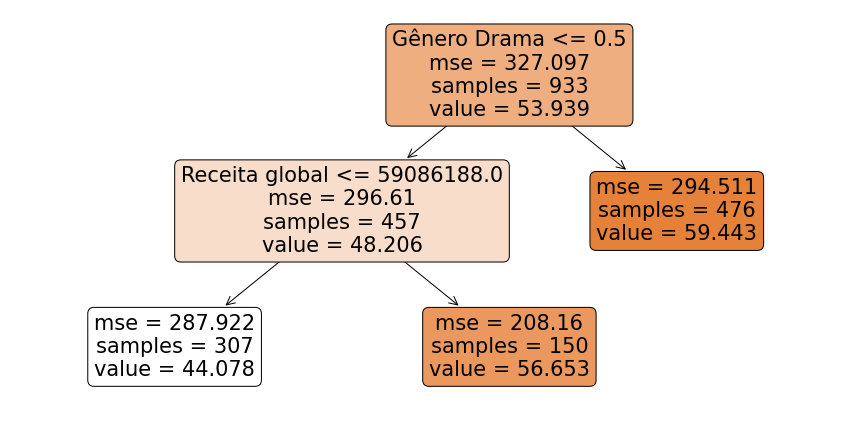

In [57]:
# Aplicando a árvore de decisão regressiva com o módulo tree do sklearn
dt = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha_ideal)
# o parâmetro max_depth define quantas linhas de nós existirão na árvore. Utilizamos 3 aqui para que o plot não
#fique poluído demais e para que possa se entender melhor o conceito de uma árvore de decisão regressiva
dt.fit(X_train,y_train)
prediction2 = dt.predict(X_test)

#cálculo do R-Quadrado e do Erro médio
r2_dt = metrics.r2_score(y_test,prediction2)
mse_dt = MSE(y_test,prediction2)
rmse_dt = mse_dt**0.5

#gerando um arquivo de texto com os dados da árvore
#a árvore pode ser vizualizada copiando as informações do arquivo dtregression.dot e colando no site http://www.webgraphviz.com/
#export_graphviz(dt, out_file='dtregression.dot',feature_names=['action', 'drama', 'budget', 'em_ingles', 'americano', 'worlwide_gross_income', 'duration'])
plt.figure(figsize=(15,7.5))
plot_tree(dt,filled=True,rounded=True,
          feature_names=['Gênero Ação', 'Gênero Drama', 'Orçamento', 'Em inglês', 'Americano', 'Receita global', 'Duração']);
print(f'O erro médio encontrado foi {rmse_dt.round(2)}')
print(f'O coeficiente R-Quadrado encontrado foi {r2_dt.round(3)}')

<h2>Conclusão

<h3> Comparação de modelos

Os modelos tiveram performances distintas . Os coeficientes R-quadrado e erro médio absoluto obtidos foram mais adequados no primeiro modelo (regressão linear por mínimos quadrados) com valores de 0.234 e 13, respectivamente. Já no segundo modelo (regressão por árvore de decisão) os mesmos coeficientes foram 0.118 e 17. O ideal para ambos os modelos é que R-quadrado seja o mais próximo possível de 1 e que o erro médio absoluto seja o mais próximo de zero. Assim o modelo de regressão linear por mínimos quadrados aparenta ser melhor para prever o metascore de um filme com base nas features selecionadas, embora nenhum deles tenha apresentado uma performance confiável(de acordo com a <a href=https://www.myaccountingcourse.com/accounting-dictionary/r-squared>literatura</a>, isso ocorre para casos em que o valor R-quadrado é maior que 0.7).

<h3> Possíveis iterações

Afim de aumentar a confiança dos resultados obtidos e melhorar a performance dos modelos, poderia-se fazer seleções de outras combinações de features afim de encontrar variáveis mais relevantes em relação ao metascore (gênero do diretor, numero de estrelas no elenco, prêmios internacionais recebidos, etc.). Também é possível que esses modelos não sejam os mais adequados para esse tipo de previsão, existindo outros que poderiam apresentar melhor performance, como <a href='https://gdcoder.com/random-forest-regressor-explained-in-depth/'>Random forest regression</a>.Outra possibilidade é trabalhar com os mesmos modelos só que com <a href='http://nbcgib.uesc.br/lec/download/material_didatico/pdf_files/est_experimental/transformacoes.pdf'>alterações de escalas dos valores numéricos</a>, possibilitando a investigação de padrões ocultos na base de dados, que poderiam ajudar no processo de regressão. Assim em futuras iterações essas medidas podem ser levadas em conta com o objetivo de obter uma previsão mais confiável.

<h3>Considerações finais

Começou-se esse projeto partindo do pressuposto que a arte é algo subjetivo, o que faria atribuir uma nota a uma obra uma tarefa muito difícil e pessoal. Falhar em definir um modelo de previsão de nota adequado era portanto algo esperado, já que teoricamente não deveria haver a interferência de elementos externos à obra em si no processo de avaliação. Contudo, ainda é possível observar alguns padrões de comportamento notáveisv(como atribuição de notas maiores para filmes dramáticos e/ou mais longos), que oferecem indícios de que não seria impossível desenvolver um modelo de predição condizente e adequado para prever a pontuação de um filme através de fatores externos a ele.